In [12]:
from database.adatabase import ADatabase
from extractor.alp_client_extractor import ALPClientExtractor
from extractor.tiingo_extractor import TiingoExtractor
from processor.processor import Processor as processor
from datetime import datetime, timedelta
from tqdm import tqdm 
from dotenv import load_dotenv
load_dotenv()
import os
import pandas as pd
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema


In [20]:
# Initialize parameters
window = 100
gain_window = 5
extractor = ALPClientExtractor(os.getenv("APCAKEY"), os.getenv("APCASECRET"))
tickers = ["AAVE", "AVAX", "BAT", "BTC", "CRV", "DOGE", "DOT", "ETH", "GRT", "LINK", "LTC", "MKR", "SHIB", "SUSHI", "UNI", "XTZ", "YFI"]
tickers = [x + "/USD" for x in tickers]

prices = []
start = datetime.now() - timedelta(days=360)
end = datetime.now()

# Loop through each ticker to fetch prices and calculate metrics
for ticker in tickers:
    response = extractor.crypto(ticker, start,end)
    price = pd.DataFrame(response["bars"][ticker]).rename(columns={"c": "adjclose", "t": "date"})[["date", "adjclose"]]
    
    # Convert date and sort
    price["date"] = pd.to_datetime(price["date"])
    price = price.sort_values("date")
    
    # Calculate metrics
    price["rolling_return"] = ((price["adjclose"].rolling(window).mean() - price["adjclose"]) / price["adjclose"])
    price["bollinger"] = ((price["adjclose"].rolling(window).mean() - price["adjclose"].rolling(window).std() - price["adjclose"]) / price["adjclose"])
    price["return"] = price["adjclose"].pct_change(gain_window)
    price["avg_return"] = price["return"].pct_change(gain_window).rolling(window).mean()
    price["coev"] = (price["adjclose"].rolling(window).mean() / price["adjclose"].rolling(window).std())
    price["ticker"] = ticker
    prices.append(price)

# Combine all prices into a single DataFrame
sim = pd.concat(prices).sort_values("date").dropna()

In [21]:
sim

,date,adjclose,rolling_return,bollinger,return,avg_return,coev,ticker
109,2024-01-20 06:00:00+00:00,6.884115,-0.117716,-0.341645,-0.084742,-0.957374,3.940018,DOT/USD
109,2024-01-20 06:00:00+00:00,15.566450,-0.120356,-0.276347,0.029902,1.879438,5.639065,LINK/USD
109,2024-01-20 06:00:00+00:00,0.527080,0.070962,-0.055517,-0.038779,-2.429155,8.467508,CRV/USD
109,2024-01-20 06:00:00+00:00,0.000009,-0.053793,-0.175250,-0.013001,-2.875548,7.790519,SHIB/USD
109,2024-01-20 06:00:00+00:00,0.231698,-0.023119,-0.122271,-0.035237,-0.987796,9.852422,BAT/USD
...,...,...,...,...,...,...,...,...
360,2024-09-27 05:00:00+00:00,167.173500,-0.319114,-0.466903,-0.030035,-9.004148,4.607154,AAVE/USD
360,2024-09-27 05:00:00+00:00,0.197610,-0.098159,-0.170542,0.040203,2.682112,12.459198,BAT/USD
360,2024-09-27 05:00:00+00:00,0.764652,-0.130232,-0.245343,0.098373,-1.249945,7.555866,SUSHI/USD
360,2024-09-27 05:00:00+00:00,0.189101,-0.096928,-0.252231,0.111110,-1.225523,5.814888,GRT/USD


In [22]:
metrics = [
    "rolling_return",
    "bollinger",
    "return",
    "avg_return",
    "coev"
]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1211.27it/s]


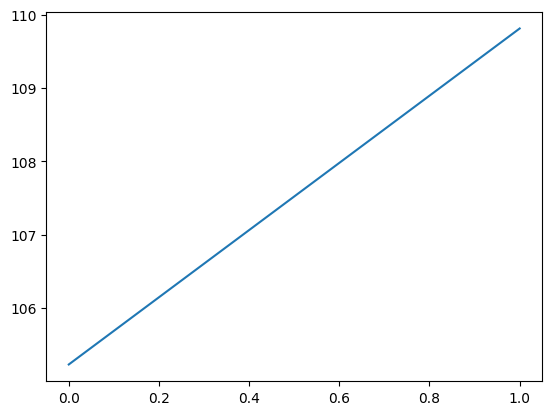

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1211.27it/s]


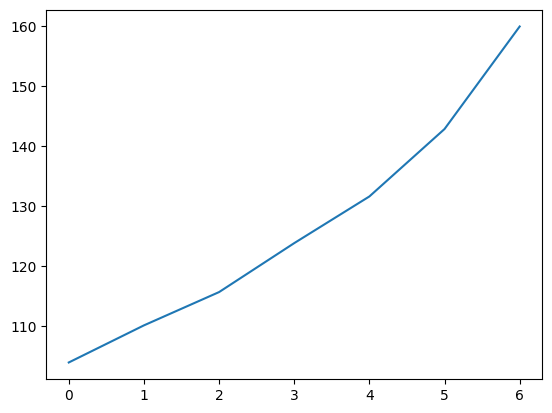

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1222.99it/s]


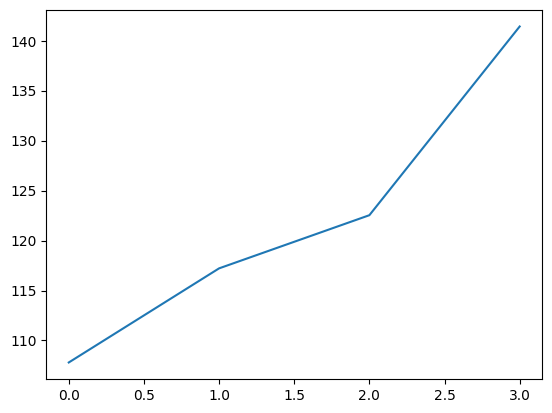

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1217.12it/s]


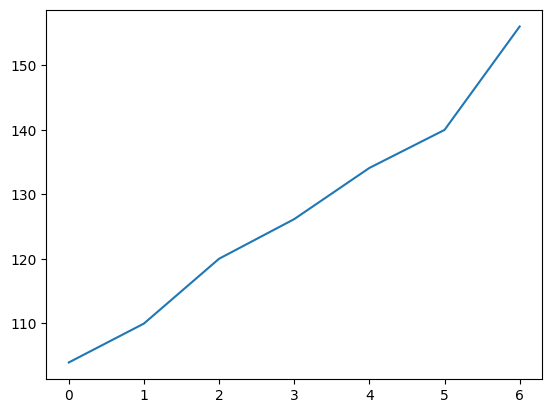

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1211.27it/s]


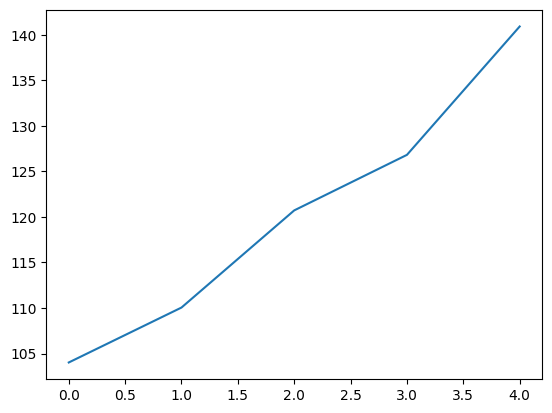

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1205.47it/s]


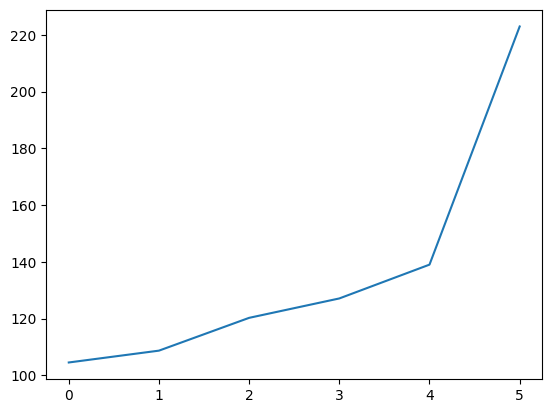

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1223.03it/s]


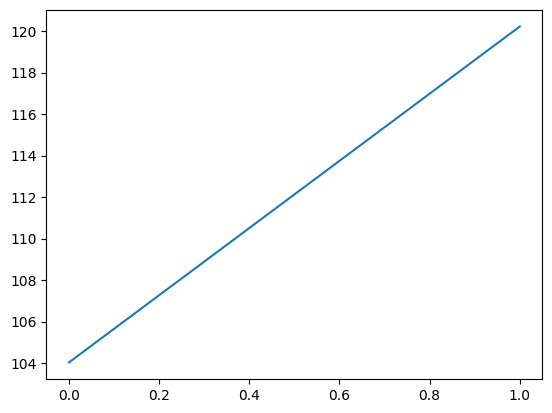

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1223.03it/s]


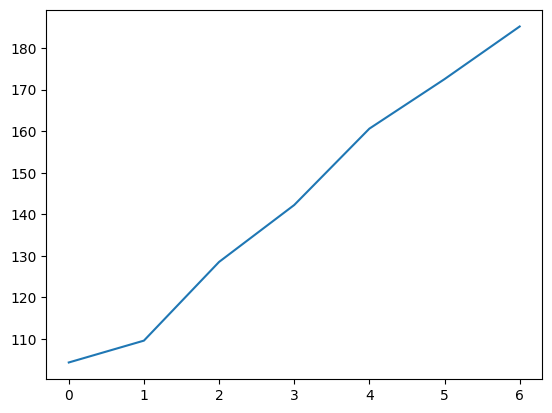

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1223.03it/s]


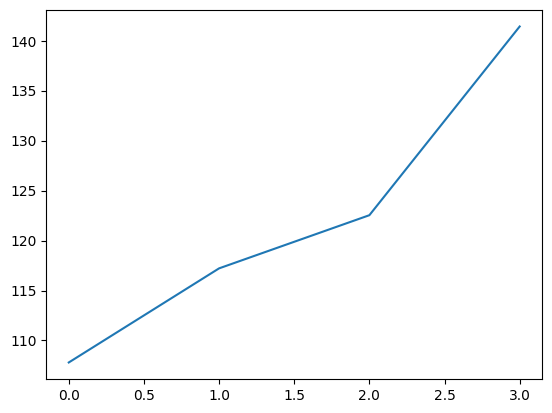

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 1205.47it/s]


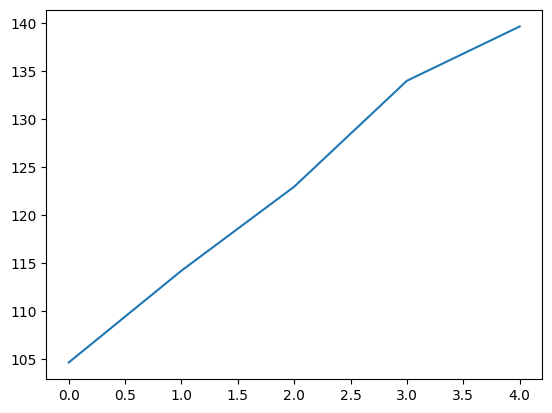

In [23]:
import copy
analysis = []
date_range = list(sim["date"].unique())
base_position = {"date":date_range[0],"ticker":"","quantity":0,"adjclose":0,"buy_price":0,"buy_date":date_range[0]}
for metric in metrics:
    for ascending in [True,False]:
        cash = 100
        position = copy.deepcopy(base_position)
        cashes = []
        for date in tqdm(date_range):
            try:
                position = copy.deepcopy(position)
                position["date"] = date
                today = sim[sim["date"]==date]
                if today.index.size >= 0:
                    opportunity = today.sort_values(metric,ascending=ascending).iloc[0]
                    if position["ticker"] != "":
                        position["adjclose"] = today[today["ticker"]==position["ticker"]]["adjclose"].iloc[0].item()
                        pnl_req = ((position["adjclose"] - position["buy_price"]) / position["buy_price"] >= 0.05)
                        loss_req = ((position["adjclose"] - position["buy_price"]) / position["buy_price"] <= -0.05)
                        hpr_req = (date - position["buy_date"]).days > 7
                        if pnl_req:
                            try:
                                cash = position["adjclose"] * position["quantity"] * 0.99
                                cashes.append(cash)
                                position = copy.deepcopy(base_position)
                                position["date"] = date
                                position["ticker"] = opportunity["ticker"]
                                position["quantity"] = cash / opportunity["adjclose"] 
                                position["adjclose"] = opportunity["adjclose"]
                                position["buy_price"] = opportunity["adjclose"]
                                position["buy_date"] = date
                            except Exception as e:
                                continue
                    else:
                        position["date"] = date
                        position["ticker"] = opportunity["ticker"]
                        position["quantity"] = cash / opportunity["adjclose"] 
                        position["adjclose"] = opportunity["adjclose"]
                        position["buy_price"] = opportunity["adjclose"]
                        position["buy_date"] = date
            except Exception as e:
                continue
        position["metric"] = metric
        position["ascending"] = ascending
        position["pv"] = position["adjclose"] * position["quantity"]
        analysis.append(copy.deepcopy(position))

In [24]:
a = pd.DataFrame(analysis)
a.sort_values("pv",ascending=False)

,date,ticker,quantity,adjclose,buy_price,buy_date,metric,ascending,pv
5,2024-09-27 05:00:00+00:00,SHIB/USD,5.750628e+06,0.000019,0.000039,2024-03-04 06:00:00+00:00,return,False,111.389658
7,2024-09-27 05:00:00+00:00,DOGE/USD,8.665010e+02,0.123620,0.213704,2024-03-28 05:00:00+00:00,avg_return,False,107.117292
1,2024-09-27 05:00:00+00:00,LINK/USD,7.715061e+00,12.745000,20.732750,2024-03-11 05:00:00+00:00,rolling_return,False,98.328459
3,2024-09-27 05:00:00+00:00,LINK/USD,7.523575e+00,12.745000,20.732750,2024-03-11 05:00:00+00:00,bollinger,False,95.887964
9,2024-09-27 05:00:00+00:00,YFI/USD,1.542913e-02,5457.288000,9049.356500,2024-03-29 05:00:00+00:00,coev,False,84.201184
2,2024-09-27 05:00:00+00:00,SHIB/USD,4.271299e+06,0.000019,0.000033,2024-03-11 05:00:00+00:00,bollinger,True,82.735055
8,2024-09-27 05:00:00+00:00,SHIB/USD,4.271299e+06,0.000019,0.000033,2024-03-11 05:00:00+00:00,coev,True,82.735055
4,2024-09-27 05:00:00+00:00,UNI/USD,9.796429e+00,7.395000,14.383250,2024-03-11 05:00:00+00:00,return,True,72.444592
6,2024-09-27 05:00:00+00:00,SHIB/USD,3.631108e+06,0.000019,0.000033,2024-03-11 05:00:00+00:00,avg_return,True,70.334566
0,2024-09-27 05:00:00+00:00,SHIB/USD,3.407741e+06,0.000019,0.000032,2024-03-10 06:00:00+00:00,rolling_return,True,66.007936
